## Notebook to create some plots 

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Github/Thesis-KNMI/Wind_contribution/Comparison/code')

import import_data as imprt
import figures as figs
import functions as func
import spectral as spec


### Create smoothed atmospheric contribution to sea level changes plot

#### Import data

In [2]:
# Import tide gauge data file
tg_data = imprt.import_obs_slh_data()

In [46]:
# Import regression results

results_np_era5, results_tim_era5, results_dang_era5 = imprt.import_reg_results('results', 'era5')
timeseries_np_era5, timeseries_tim_era5, timeseries_dang_era5 = imprt.import_reg_results('timeseries', 'era5')

results_np_20cr, results_tim_20cr, results_dang_20cr = imprt.import_reg_results('results', '20cr')
timeseries_np_20cr, timeseries_tim_20cr, timeseries_dang_20cr = imprt.import_reg_results('timeseries', '20cr')

In [4]:
# Create dataframe of necessary data:
import pandas as pd

atmos_contr_20cr = pd.concat([timeseries_np_20cr['Average', 'wind total'], timeseries_tim_20cr['Average', 'wind total'], timeseries_dang_20cr['Average', 'wind total']], keys = ['NearestPoint', 'Timmerman', 'Dangendorf'], axis=1)
atmos_contr_era5 = pd.concat([timeseries_np_era5['Average', 'wind total'], timeseries_tim_era5['Average', 'wind total'], timeseries_dang_era5['Average', 'wind total']], keys = ['NearestPoint', 'Timmerman', 'Dangendorf'], axis=1)



In [5]:
atmos_contr_20cr

,NearestPoint,Timmerman,Dangendorf
time,,,
1836,0.850216,-0.653448,-0.096446
1837,-2.303871,-2.253759,-3.091596
1838,-3.877197,-4.548937,-4.645828
1839,-2.616222,-2.987828,-4.730743
1840,0.567101,0.498559,-1.619528
...,...,...,...
2011,2.339475,2.971220,3.120865
2012,1.286387,2.928164,2.005263
2013,-2.070848,-0.963617,1.393852


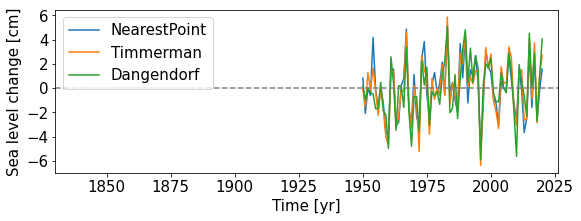

In [6]:
# Create plot
import matplotlib.pyplot as plt
colors = ['tab:blue', 'tab:orange', 'tab:green']

fsize = 15

plt.figure(figsize = (9,3))
for i,column in enumerate(atmos_contr_20cr.columns):
    plt.plot(atmos_contr_era5.index.values, atmos_contr_era5[column].values,
            color = colors[i], label = column)
plt.ylabel('Sea level change [cm]', fontsize = fsize)
plt.xlabel('Time [yr]', fontsize = fsize)
plt.xlim(1830, 2026)
plt.xticks(fontsize = fsize)
plt.yticks(fontsize = fsize)
plt.legend(loc='upper left', fontsize = 15)
plt.axhline(color='grey', linestyle='--')
plt.savefig('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/comparison/timeseries_ac_average_era5', 
            bbox_inches='tight', dpi = 500)

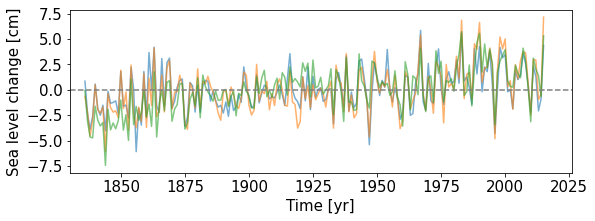

In [7]:
# Create plot
import matplotlib.pyplot as plt
colors = ['tab:blue', 'tab:orange', 'tab:green']

fsize = 15

plt.figure(figsize = (9,3))
for i,column in enumerate(atmos_contr_20cr.columns):
    plt.plot(atmos_contr_20cr.index.values, atmos_contr_20cr[column].values,
            color = colors[i], alpha = 0.6, label = column)
plt.ylabel('Sea level change [cm]', fontsize = fsize)
plt.xlabel('Time [yr]', fontsize = fsize)
plt.xlim(1830, 2026)
plt.xticks(fontsize = fsize)
plt.yticks(fontsize = fsize)
#plt.legend(loc='upper left', fontsize = 13, ncol = 3)
plt.axhline(color='grey', linestyle='--')
plt.savefig('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/comparison/timeseries_ac_average_20cr', 
            bbox_inches='tight', dpi = 500)

In [8]:
# Calculate standard error
atmos_contr_era5.std()

NearestPoint    2.284377
Timmerman       2.458453
Dangendorf      2.384267
dtype: float64

In [9]:
# Calculate standard error
atmos_contr_20cr.std()

NearestPoint    2.106247
Timmerman       2.368262
Dangendorf      2.285554
dtype: float64

The atmospheric contribution has a standard error between 2.1 and 2.5 cm. The AC reaches maxima of raising and dropping the sea level by 6 cm. 

In [10]:
# Create smoothed dataframe
import statsmodels.api as sm
import statsmodels as sm
lowess = sm.nonparametric.smoothers_lowess.lowess
window = 31 # Smoothing window for lowpass filter

atmos_contr_20cr_lws = atmos_contr_20cr.copy()
atmos_contr_era5_lws = atmos_contr_era5.copy()

for column in atmos_contr_20cr_lws.columns:
    atmos_contr_20cr_lws[column] = lowess(atmos_contr_20cr_lws[column].values,
                                         atmos_contr_20cr_lws.index.values,
                                         (window/atmos_contr_20cr_lws.index.size),
                                         return_sorted = False)
    atmos_contr_era5_lws[column] = lowess(atmos_contr_era5_lws[column].values,
                                         atmos_contr_era5_lws.index.values,
                                         (window/atmos_contr_era5_lws.index.size),
                                         return_sorted = False)

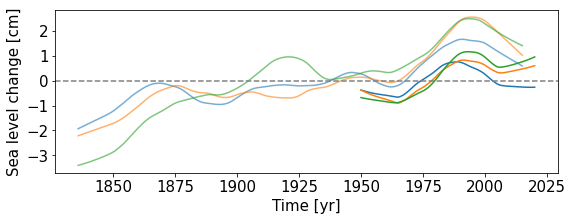

In [11]:
# Create plot
import matplotlib.pyplot as plt
colors = ['tab:blue', 'tab:orange', 'tab:green']

fsize = 15

plt.figure(figsize = (9,3))
for i,column in enumerate(atmos_contr_20cr_lws.columns):
    plt.plot(atmos_contr_20cr_lws.index.values, atmos_contr_20cr_lws[column].values,
            color = colors[i], alpha = 0.6)
    plt.plot(atmos_contr_era5_lws.index.values, atmos_contr_era5_lws[column].values,
            color = colors[i], label = column)
plt.ylabel('Sea level change [cm]', fontsize = fsize)
plt.xlabel('Time [yr]', fontsize = fsize)
plt.xticks(fontsize = fsize)
plt.yticks(fontsize = fsize)
#plt.legend(loc='upper left')
plt.axhline(color='grey', linestyle='--')

plt.savefig('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/comparison/timeseries_ac_average_31', 
            bbox_inches='tight', dpi = 500)

In [12]:
# Create detrended and smoothed dataframe
import statsmodels.api as sm
import statsmodels as sm
from scipy.signal import detrend

lowess = sm.nonparametric.smoothers_lowess.lowess
window = 31 # Smoothing window for lowpass filter

atmos_contr_20cr_lws_dt = atmos_contr_20cr.apply(detrend)
atmos_contr_era5_lws_dt = atmos_contr_era5.apply(detrend)

for column in atmos_contr_20cr_lws_dt.columns:
    atmos_contr_20cr_lws_dt[column] = lowess(atmos_contr_20cr_lws_dt[column].values,
                                         atmos_contr_20cr_lws_dt.index.values,
                                         (window/atmos_contr_20cr_lws_dt.index.size),
                                         return_sorted = False)
    atmos_contr_era5_lws_dt[column] = lowess(atmos_contr_era5_lws_dt[column].values,
                                         atmos_contr_era5_lws_dt.index.values,
                                         (window/atmos_contr_era5_lws_dt.index.size),
                                         return_sorted = False)

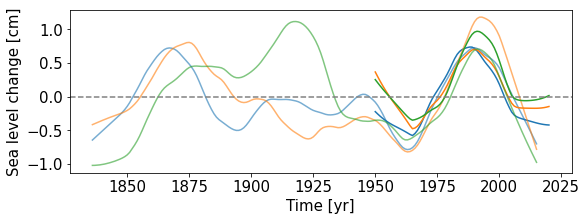

In [13]:
# Create plot
import matplotlib.pyplot as plt
colors = ['tab:blue', 'tab:orange', 'tab:green']

fsize = 15

plt.figure(figsize = (9,3))
for i,column in enumerate(atmos_contr_20cr_lws_dt.columns):
    plt.plot(atmos_contr_20cr_lws_dt.index.values, atmos_contr_20cr_lws_dt[column].values,
            color = colors[i], alpha = 0.6)
    plt.plot(atmos_contr_era5_lws_dt.index.values, atmos_contr_era5_lws_dt[column].values,
            color = colors[i], label = column)
plt.ylabel('Sea level change [cm]', fontsize = fsize)
plt.xlabel('Time [yr]', fontsize = fsize)
plt.xticks(fontsize = fsize)
plt.yticks(fontsize = fsize)
#plt.legend(loc='upper left')
plt.axhline(color='grey', linestyle='--')

plt.savefig('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/comparison/timeseries_ac_average_31_detrended', 
            bbox_inches='tight', dpi = 500)

In [14]:
import numpy as np
from scipy.stats import linregress

def get_decadal_trends_stds(data, time_period):
    """
    Function to obtain lists of years, trends and standard errors
    time_period should be an odd number
    
    """
    y0 = data.index[0] + time_period//2
    yend = data.index[-1] - time_period//2
    years = np.arange(y0, yend)
    starting_years = np.arange(data.index[0], data.index[-1]-time_period + 1)
    trends = []
    stds = []
    
    for yr in starting_years:
        time = np.arange(yr, yr+time_period)
        y = data.loc[yr:yr+time_period-1].values
        trends.append(linregress(time,y).slope*10)
        stds.append(linregress(time,y).stderr*10)
        
    return years, trends, stds



### Plot of the 39 year trends of tide gauge data and atmospheric contribution of ERA5 and 20CRv3

In [15]:
tg_data

,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average
time,,,,,,,
1890,-13.324982,-14.301278,-9.082765,-13.170729,-9.492090,-15.271739,-12.440594
1891,-16.295109,-13.976964,-5.868629,-10.960301,-7.680118,-11.552435,-11.055612
1892,-16.348604,-11.035473,-5.936321,-11.131340,-6.949764,-8.415465,-9.969533
1893,-13.868134,-11.958908,-4.066908,-6.864532,-5.381872,-3.842420,-7.663849
1894,-9.040204,-13.133332,-4.345644,-10.244839,-5.061525,-4.418967,-7.707481
...,...,...,...,...,...,...,...
2016,15.360605,19.100172,12.247738,16.870359,13.344591,14.544013,15.244645
2017,16.917654,21.255818,16.100814,22.622499,17.897121,17.498395,18.715443
2018,12.322149,15.357192,9.296475,12.816077,7.591566,10.596956,11.330117


In [16]:
tg_years, tg_trends,tg_std = get_decadal_trends_stds(tg_data.loc[1950:2015]['Average'], 65)

In [17]:
tg_trends

[1.9952436437473207]

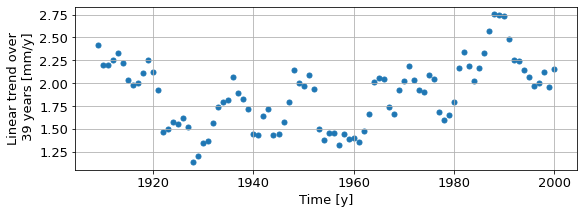

In [18]:
import matplotlib.pyplot as plt
fsize = 13
time_period = 39

plt.figure(figsize = (9,3))
plt.ylabel(f'Linear trend over\n {time_period} years [mm/y]', fontsize = fsize)
plt.xlabel('Time [y]', fontsize = fsize)
plt.xticks(fontsize = fsize)
plt.yticks(fontsize = fsize)
#plt.axhline(linestyle = '--', color = 'grey')
plt.grid()
tg_years, tg_trends, tg_std =  get_decadal_trends_stds(tg_data['Average'], time_period)
plt.scatter(tg_years, tg_trends, marker = 'o', s = 25)

#plt.legend(fontsize = 11, ncol = 2)  

plt.savefig('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/comparison/trends_tg', 
            bbox_inches='tight')

In [19]:
import pandas as pd

df = pd.DataFrame({'time':tg_years, 'trend':tg_trends})
df_tg = df.set_index('time')
df_tg[:-5]

,trend
time,
1909,2.419818
1910,2.197897
1911,2.201229
1912,2.258973
1913,2.332370
...,...
1991,2.487626
1992,2.252741
1993,2.238871


### Plot of the 41 year trends of detrended tide gauge data and atmospheric contribution of ERA5 and 20CRv3

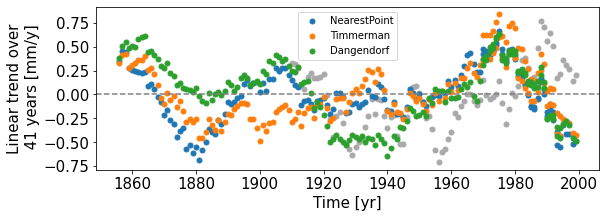

In [20]:
fsize = 15
time_period = 41
colors = ['tab:blue', 'tab:orange', 'tab:green']

tg_data_dt = tg_data.apply(detrend)
ac_20cr_dt = atmos_contr_20cr.apply(detrend)
ac_era5_dt = atmos_contr_era5.apply(detrend)

plt.figure(figsize = (9,3))
plt.ylabel('Linear trend over\n 41 years [mm/y]', fontsize = fsize)
plt.xlabel('Time [yr]', fontsize = fsize)
plt.xticks(fontsize = fsize)
plt.yticks(fontsize = fsize)
plt.axhline(linestyle = '--', color = 'grey')

tg_years, tg_trends, tg_std =  get_decadal_trends_stds(tg_data_dt['Average'], time_period)
plt.scatter(tg_years, tg_trends, color = 'darkgrey', marker = 'o', s = 25)

for k, column in enumerate(ac_20cr_dt):
    years, trends, std =  get_decadal_trends_stds(ac_20cr_dt[column], time_period)
    plt.scatter(years, trends, marker = 'o', s = 25, color = colors[k], label = column)
    
    years, trends, std =  get_decadal_trends_stds(ac_era5_dt[column], time_period)
    plt.scatter(years, trends, marker = 'o', s = 25, color = colors[k])
    
plt.legend()

plt.savefig('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/comparison/trends_ac_average_detrended', 
            bbox_inches='tight')

### Plot of the 41 year trends of detrended and smoothed tide gauge data and atmospheric contribution of ERA5 and 20CRv3

In [21]:
# Create detrended and smoothed dataframe
import statsmodels.api as sm
import statsmodels as sm
from scipy.signal import detrend

lowess = sm.nonparametric.smoothers_lowess.lowess
window = 31 # Smoothing window for lowpass filter

tg_data_lws_dt = tg_data.apply(detrend)

for column in tg_data_lws_dt.columns:
    tg_data_lws_dt[column] = lowess(tg_data_lws_dt[column].values,
                                         tg_data_lws_dt.index.values,
                                         (window/tg_data_lws_dt.index.size),
                                         return_sorted = False)

<AxesSubplot:xlabel='Time [y]', ylabel='Sea level change [cm]'>

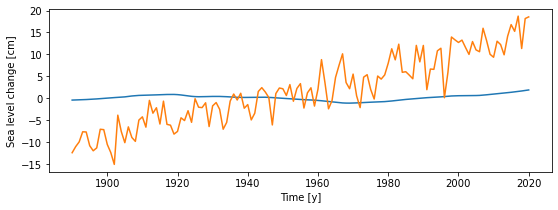

In [22]:
tg_data_lws_dt['Average'].plot(figsize=(9,3), xlabel = 'Time [y]', ylabel = 'Sea level change [cm]')
tg_data['Average'].plot(figsize=(9,3), xlabel = 'Time [y]', ylabel = 'Sea level change [cm]')

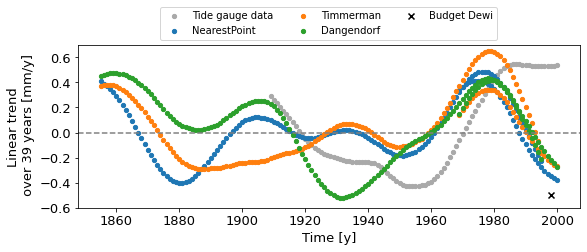

In [23]:
fsize = 13
ssize = 18
time_period = 39
colors = ['tab:blue', 'tab:orange', 'tab:green']

plt.figure(figsize = (9,3))
plt.ylabel(f'Linear trend\n over {time_period} years [mm/y]', fontsize = fsize)
plt.xlabel('Time [y]', fontsize = fsize)
plt.xticks(fontsize = fsize)
plt.yticks(fontsize = fsize)
plt.axhline(linestyle = '--', color = 'grey')
plt.ylim(-0.6, 0.7)
tg_years, tg_trends, tg_std =  get_decadal_trends_stds(tg_data_lws_dt['Average'], time_period)
plt.scatter(tg_years, tg_trends, color = 'darkgrey', marker = 'o', s = ssize, label = 'Tide gauge data')

for k, column in enumerate(atmos_contr_20cr_lws_dt):
    years, trends, std1 =  get_decadal_trends_stds(atmos_contr_20cr_lws_dt[column], time_period)
    plt.scatter(years, trends, marker = 'o', s = ssize, color = colors[k], label = column)
    
    years, trends, std2 =  get_decadal_trends_stds(atmos_contr_era5_lws_dt[column], time_period)
    plt.scatter(years, trends, marker = 'o', s = ssize, color = colors[k])
plt.scatter(1998, -0.5, marker = 'x', color = 'k', label = 'Budget Dewi')  
plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1), fontsize = 10, ncol = 3)

plt.savefig('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/comparison/trends_ac_average_31_detrended', 
            bbox_inches='tight')

### Plot of the 41 year trends of detrended and smoothed atmospheric contribution of ERA5 and 20CRv3

<AxesSubplot:xlabel='time'>

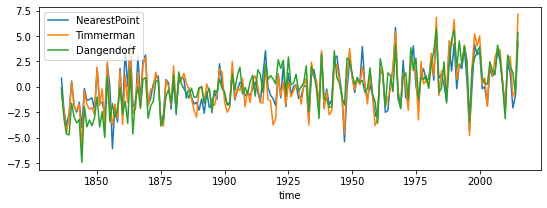

In [24]:
atmos_contr_20cr.plot(figsize = (9,3))

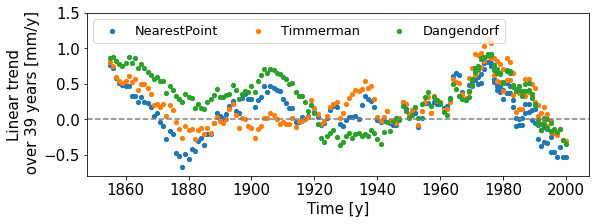

In [25]:
fsize = 15
ssize = 18
time_period = 39
colors = ['tab:blue', 'tab:orange', 'tab:green']

plt.figure(figsize = (9,3))
plt.ylabel(f'Linear trend\n over {time_period} years [mm/y]', fontsize = fsize)
plt.xlabel('Time [y]', fontsize = fsize)
plt.xticks(fontsize = fsize)
plt.yticks(fontsize = fsize)
plt.axhline(linestyle = '--', color = 'grey')
plt.ylim(-0.8, 1.5)
#plt.xlim(1855, 2015)
for k, column in enumerate(atmos_contr_20cr):
    years, trends, std1 =  get_decadal_trends_stds(atmos_contr_20cr[column], time_period)
    plt.scatter(years, trends, marker = 'o', s = ssize, color = colors[k], label = column)
    
    years, trends, std2 =  get_decadal_trends_stds(atmos_contr_era5[column], time_period)
    plt.scatter(years, trends, marker = 'o', s = ssize, color = colors[k])
#plt.scatter(1998, -0.5, marker = 'x', color = 'k', label = 'Budget Dewi')  
plt.legend(fontsize = 13, ncol = 3, loc = 'upper left')

plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/comparison/trends_ac_average_{time_period}', 
            bbox_inches='tight', dpi = 500)

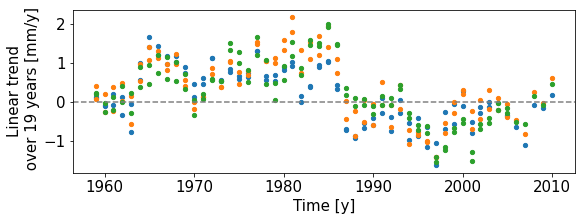

In [26]:
fsize = 15
ssize = 18
time_period = 19
colors = ['tab:blue', 'tab:orange', 'tab:green']

plt.figure(figsize = (9,3))
plt.ylabel(f'Linear trend\n over {time_period} years [mm/y]', fontsize = fsize)
plt.xlabel('Time [y]', fontsize = fsize)
plt.xticks(fontsize = fsize)
plt.yticks(fontsize = fsize)
plt.axhline(linestyle = '--', color = 'grey')
#plt.ylim(-2, 3.4)
#plt.xlim(1855, 2015)
#plt.xticks([1950, 1970, 1990, 2010])

for k, column in enumerate(atmos_contr_20cr):
    years, trends, std1 =  get_decadal_trends_stds(atmos_contr_20cr.loc[1950:][column], time_period)
    plt.scatter(years, trends, marker = 'o', s = ssize, color = colors[k], label = column)
    
    years, trends, std2 =  get_decadal_trends_stds(atmos_contr_era5.loc[1950:][column], time_period)
    plt.scatter(years, trends, marker = 'o', s = ssize, color = colors[k])
#plt.scatter(1998, -0.5, marker = 'x', color = 'k', label = 'Budget Dewi')  
#plt.legend(fontsize = 13, ncol = 3, loc = 'upper left')

plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/comparison/trends_ac_average_{time_period}', 
            bbox_inches='tight', dpi = 500)

In [27]:
np.mean(std1)

0.8758226444363907

In [28]:
-0.21749940457828304 - np.mean(std2)

-1.2121858412720434

In [29]:
np.mean(std2)

0.9946864366937604

For ERA5 the error is in the order of 0.04mm/y and for 20crv3 in the order of 0.03 mm/y. The found trend for 1998 is not similar to the trend found by Dewi

### Plot of the 41 year trends of smoothed atmospheric contribution of ERA5 and 20CRv3

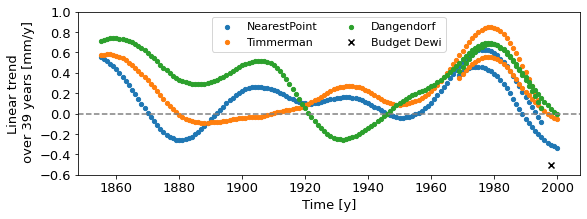

In [30]:
fsize = 13
ssize = 18
time_period = 39
colors = ['tab:blue', 'tab:orange', 'tab:green']

plt.figure(figsize = (9,3))
plt.ylabel(f'Linear trend\n over {time_period} years [mm/y]', fontsize = fsize)
plt.xlabel('Time [y]', fontsize = fsize)
plt.xticks(fontsize = fsize)
plt.yticks(fontsize = fsize)
plt.axhline(linestyle = '--', color = 'grey')
plt.ylim(-0.6, 1.0)

for k, column in enumerate(atmos_contr_20cr_lws):
    years, trends, std1 =  get_decadal_trends_stds(atmos_contr_20cr_lws[column], time_period)
    plt.scatter(years, trends, marker = 'o', s = ssize, color = colors[k], label = column)
    
    years, trends, std2 =  get_decadal_trends_stds(atmos_contr_era5_lws[column], time_period)
    plt.scatter(years, trends, marker = 'o', s = ssize, color = colors[k])
plt.scatter(1998, -0.5, marker = 'x', color = 'k', label = 'Budget Dewi')  
plt.legend(fontsize = 11, ncol = 2)

plt.savefig('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/comparison/trends_ac_average_31', 
            bbox_inches='tight')

### Plot the tide gauge data corrected for atmospheric contribution

In [31]:
tg_data_av = tg_data['Average']

tg_data_corr = pd.DataFrame({'time':tg_data_av.index.values, 'NearestPoint':'', 'Timmerman':'', 'Dangendorf':''})
tg_data_corr = tg_data_corr.set_index('time')
tg_data_corr_20cr = tg_data_corr.loc[1890:2015].copy()
tg_data_corr_era5 = tg_data_corr.loc[1950:2020].copy()
tg_data_av_20cr = tg_data_av.loc[1890:2015].copy()
tg_data_av_era5 = tg_data_av.loc[1950:2020].copy()

for column in tg_data_corr_20cr:
    tg_data_corr_20cr[column] = tg_data_av_20cr.values - atmos_contr_20cr.loc[1890:2015, column].values
    tg_data_corr_era5[column] = tg_data_av_era5.values - atmos_contr_era5.loc[1950:2020, column].values

#### Plot of the 20CRv3 corrected tide gauge data

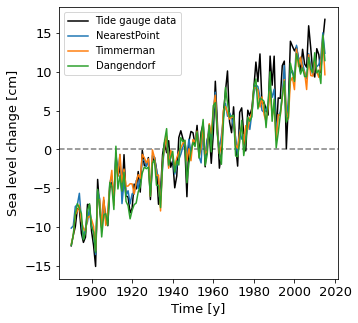

In [32]:
fsize = 13

plt.figure(figsize = (5,5))
plt.xlabel('Time [y]', fontsize = fsize)
plt.ylabel('Sea level change [cm]', fontsize = fsize)
plt.xticks(fontsize = fsize)
plt.yticks(fontsize = fsize)
plt.axhline(linestyle = '--', color = 'grey')
plt.plot(tg_data_av_20cr.index, tg_data_av_20cr.values, color = 'k', label = 'Tide gauge data')
for column in tg_data_corr_20cr:
    plt.plot(tg_data_corr_20cr.index, tg_data_corr_20cr[column].values, label = column)
plt.legend()

plt.savefig('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/TG_correction/nonsmoothed_20cr', dpi = 500, bbox_inches = 'tight')

#### Plot of the ERA5 corrected tide gauge data

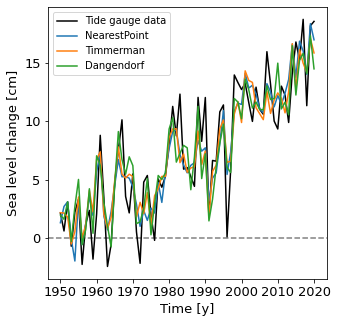

In [33]:
fsize = 13

plt.figure(figsize = (5,5))
plt.xlabel('Time [y]', fontsize = fsize)
plt.ylabel('Sea level change [cm]', fontsize = fsize)
plt.xticks(fontsize = fsize)
plt.yticks(fontsize = fsize)
plt.axhline(linestyle = '--', color = 'grey')
plt.plot(tg_data_av_era5.index, tg_data_av_era5.values, color = 'k', label = 'Tide gauge data')
for column in tg_data_corr_era5:
    plt.plot(tg_data_corr_era5.index, tg_data_corr_era5[column].values, label = column)
plt.legend()

plt.savefig('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/TG_correction/nonsmoothed_era5', dpi = 500, bbox_inches = 'tight')

#### Plot of the 20CRv3 corrected tide gauge data with 31 year LOWESS 

In [34]:
window = 31

tg_data_av_20cr_lws = tg_data_av_20cr.copy()
tg_data_corr_20cr_lws = tg_data_corr_20cr.copy()

lws = lowess(tg_data_av_20cr.values,
             tg_data_av_20cr.index.values,
            (window/tg_data_av_20cr.index.size),
             return_sorted = False)

tg_data_av_20cr_lws = pd.DataFrame({'time':tg_data_av_20cr.index.values, 'SLC':lws})
tg_data_av_20cr_lws = tg_data_av_20cr_lws.set_index('time')
for column in tg_data_corr_20cr_lws.columns:
    tg_data_corr_20cr_lws[column] = lowess(tg_data_corr_20cr_lws[column].values,
                                         tg_data_corr_20cr_lws.index.values,
                                         (window/tg_data_corr_20cr_lws.index.size),
                                         return_sorted = False)
    

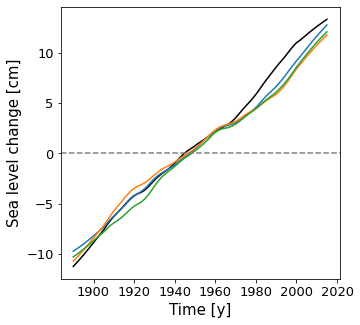

In [35]:
fsize = 13

plt.figure(figsize = (5,5))
plt.xlabel('Time [y]', fontsize = 15)
plt.ylabel('Sea level change [cm]', fontsize = 15)
plt.xticks(fontsize = fsize)
plt.yticks(fontsize = fsize)
plt.plot(tg_data_av_20cr_lws.index, tg_data_av_20cr_lws.values, color = 'k', label = 'Tide gauge data')
for column in tg_data_corr_20cr_lws:
    plt.plot(tg_data_corr_20cr_lws.index, tg_data_corr_20cr_lws[column].values, label = column)
plt.axhline(linestyle = '--', color = 'grey')
plt.savefig('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/TG_correction/smoothed_20cr', dpi = 500, bbox_inches = 'tight')


#### Plot of the ERA5 corrected tide gauge data with 31 year LOWESS 

In [36]:
window = 31

tg_data_av_era5_lws = tg_data_av_era5.copy()
tg_data_corr_era5_lws = tg_data_corr_era5.copy()

lws = lowess(tg_data_av_era5.values,
             tg_data_av_era5.index.values,
            (window/tg_data_av_era5.index.size),
             return_sorted = False)

tg_data_av_era5_lws = pd.DataFrame({'time':tg_data_av_era5.index.values, 'SLC':lws})
tg_data_av_era5_lws = tg_data_av_era5_lws.set_index('time')
for column in tg_data_corr_era5_lws.columns:
    tg_data_corr_era5_lws[column] = lowess(tg_data_corr_era5_lws[column].values,
                                         tg_data_corr_era5_lws.index.values,
                                         (window/tg_data_corr_era5_lws.index.size),
                                         return_sorted = False)
    

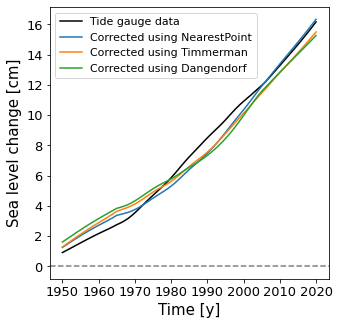

In [37]:
fsize = 13

plt.figure(figsize = (5,5))
plt.xlabel('Time [y]', fontsize = 15)
plt.ylabel('Sea level change [cm]', fontsize = 15)
plt.xticks(fontsize = fsize)
plt.yticks(fontsize = fsize)
plt.plot(tg_data_av_era5_lws.index, tg_data_av_era5_lws.values, color = 'k', label = 'Tide gauge data')
for column in tg_data_corr_era5_lws:
    plt.plot(tg_data_corr_era5_lws.index, tg_data_corr_era5_lws[column].values, label = column)
plt.legend(labels = ['Tide gauge data', 
                     'Corrected using NearestPoint', 
                     'Corrected using Timmerman', 
                     'Corrected using Dangendorf'], fontsize = 11)
plt.axhline(linestyle = '--', color = 'grey')

plt.savefig('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/TG_correction/smoothed_era5', dpi = 500, bbox_inches = 'tight')

### Tide gauge data without wind effect

#### Import data

In [38]:
# Import tide gauge data file
tg_data = imprt.import_obs_slh_data()

In [39]:
# Import regression results

results_np_era5, results_tim_era5, results_dang_era5 = imprt.import_reg_results('results', 'era5')
timeseries_np_era5, timeseries_tim_era5, timeseries_dang_era5 = imprt.import_reg_results('timeseries', 'era5')

results_np_20cr, results_tim_20cr, results_dang_20cr = imprt.import_reg_results('results', '20cr')
timeseries_np_20cr, timeseries_tim_20cr, timeseries_dang_20cr = imprt.import_reg_results('timeseries', '20cr')

#### Correct tide gauge data

In [40]:
import pandas as pd

tg_corrected = pd.DataFrame({'time': tg_data.loc[1890:2015].index.values})
tg_corrected = tg_corrected.set_index('time')

tg_corrected['NearestPoint'] = tg_data['Average'].loc[1890:2015].values + timeseries_np_20cr.loc[1890:2015]['Average']['wind total'].values
tg_corrected['Timmerman'] = tg_data['Average'].loc[1890:2015].values + timeseries_tim_20cr.loc[1890:2015]['Average']['wind total'].values
tg_corrected['Dangendorf'] = tg_data['Average'].loc[1890:2015].values + timeseries_dang_20cr.loc[1890:2015]['Average']['wind total'].values



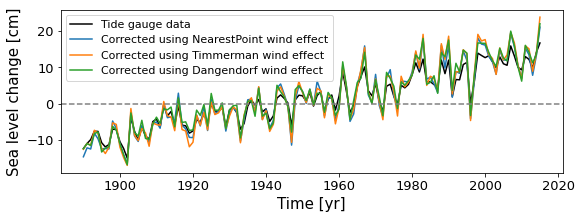

In [41]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (9,3))
tg_data['Average'].loc[1890:2015].plot(ax=ax, color = 'k')
tg_corrected.plot(ax=ax)
plt.legend(labels = ['Tide gauge data', 
                     'Corrected using NearestPoint wind effect', 
                     'Corrected using Timmerman wind effect', 
                     'Corrected using Dangendorf wind effect'], fontsize = 11)
plt.axhline(color='grey', linestyle='--')  
plt.xlabel('Time [yr]', fontsize = 15)
plt.ylabel('Sea level change [cm]', fontsize = 15)
plt.xticks(size=13)
plt.yticks(size=13)

plt.savefig('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/TG_correction/non_smoothed', dpi = 500)

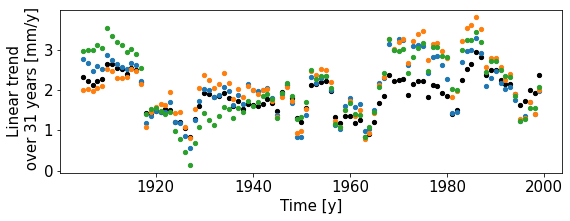

In [42]:
fsize = 15
ssize = 18
time_period = 31
colors = ['tab:blue', 'tab:orange', 'tab:green']
labels = ['Corrected using NearestPoint wind effect', 
          'Corrected using Timmerman wind effect', 
          'Corrected using Dangendorf wind effect']

plt.figure(figsize = (9,3))
plt.ylabel(f'Linear trend\n over {time_period} years [mm/y]', fontsize = fsize)
plt.xlabel('Time [y]', fontsize = fsize)
plt.xticks(fontsize = fsize)
plt.yticks(fontsize = fsize)
#plt.axhline(linestyle = '--', color = 'grey')
#plt.ylim(-0.8, 1.3)

years, trends, std1 =  get_decadal_trends_stds(tg_data.loc[1890:2015]['Average'], time_period)
plt.scatter(years, trends, marker = 'o', s = ssize, color = 'k', label = 'Tide gauge data')

for k, column in enumerate(tg_corrected):
    years, trends, std1 =  get_decadal_trends_stds(tg_corrected[column], time_period)
    plt.scatter(years, trends, marker = 'o', s = ssize, color = colors[k], label = column)
    

#plt.legend(fontsize = 11)

#plt.savefig('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/comparison/trends_ac_average_31_detrended', bbox_inches='tight')

In [43]:
import pandas as pd

tg_corrected = pd.DataFrame({'time': tg_data.loc[1950:2020].index.values})
tg_corrected = tg_corrected.set_index('time')

tg_corrected['NearestPoint'] = tg_data['Average'].loc[1950:2020].values + timeseries_np_era5.loc[1950:2020]['Average']['wind total'].values
tg_corrected['Timmerman'] = tg_data['Average'].loc[1950:2020].values + timeseries_tim_era5.loc[1950:2020]['Average']['wind total'].values
tg_corrected['Dangendorf'] = tg_data['Average'].loc[1950:2020].values + timeseries_dang_era5.loc[1950:2020]['Average']['wind total'].values



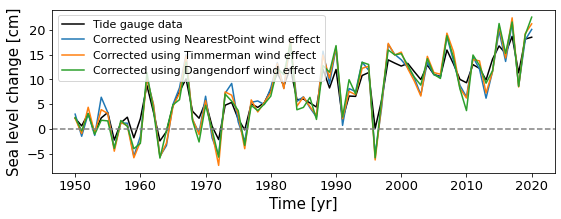

In [44]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (9,3))
tg_data['Average'].loc[1950:2020].plot(ax=ax, color = 'k')
tg_corrected.plot(ax=ax)
plt.legend(labels = ['Tide gauge data', 
                     'Corrected using NearestPoint wind effect', 
                     'Corrected using Timmerman wind effect', 
                     'Corrected using Dangendorf wind effect'], fontsize = 11)
plt.axhline(color='grey', linestyle='--')  
plt.xlabel('Time [yr]', fontsize = 15)
plt.ylabel('Sea level change [cm]', fontsize = 15)
plt.xticks(size=13)
plt.yticks(size=13)

plt.savefig('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/TG_correction/non_smoothed', dpi = 500, bbox_inches = 'tight')

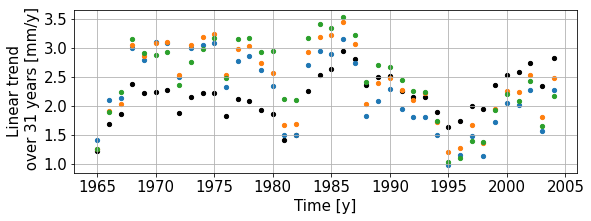

In [45]:
fsize = 15
ssize = 18
time_period = 31
colors = ['tab:blue', 'tab:orange', 'tab:green']
labels = ['Corrected using NearestPoint wind effect', 
          'Corrected using Timmerman wind effect', 
          'Corrected using Dangendorf wind effect']

plt.figure(figsize = (9,3))
plt.ylabel(f'Linear trend\n over {time_period} years [mm/y]', fontsize = fsize)
plt.xlabel('Time [y]', fontsize = fsize)
plt.xticks(fontsize = fsize)
plt.yticks(fontsize = fsize)
#plt.axhline(linestyle = '--', color = 'grey')
#plt.ylim(-0.8, 1.3)

years, trends, std1 =  get_decadal_trends_stds(tg_data.loc[1950:2020]['Average'], time_period)
plt.scatter(years, trends, marker = 'o', s = ssize, color = 'k', label = 'Tide gauge data')

for k, column in enumerate(tg_corrected):
    years, trends, std1 =  get_decadal_trends_stds(tg_corrected[column], time_period)
    plt.scatter(years, trends, marker = 'o', s = ssize, color = colors[k], label = column)
plt.grid()

#plt.legend(fontsize = 11)

#plt.savefig('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/comparison/trends_ac_average_31_detrended', bbox_inches='tight')

#### Plots of the 31-year smoothed wind influence for individual stations

In [49]:
# Import regression results

timeseries_np_era5, timeseries_tim_era5, timeseries_dang_era5 = imprt.import_reg_results('timeseries', 'era5')

timeseries_np_20cr, timeseries_tim_20cr, timeseries_dang_20cr = imprt.import_reg_results('timeseries', '20cr')

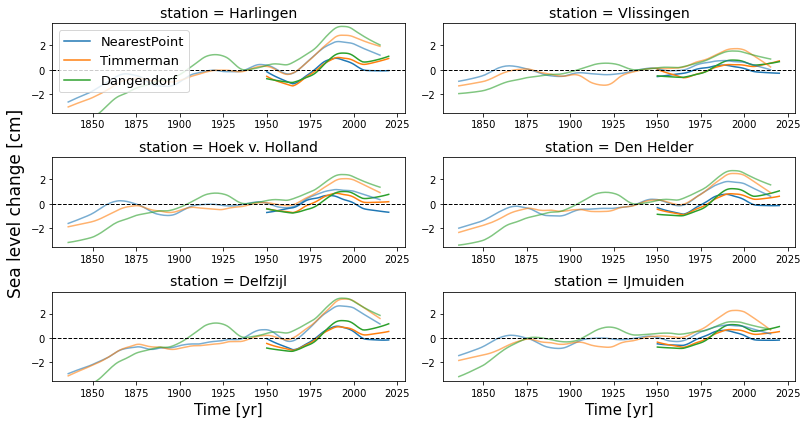

In [99]:
stations = [ 'Harlingen', 'Vlissingen', 'Hoek v. Holland', 'Den Helder', 'Delfzijl','IJmuiden']
colors = ['tab:blue', 'tab:orange', 'tab:green']
fsize = 15

# Create smoothed dataframe
import statsmodels.api as sm
import statsmodels as sm
lowess = sm.nonparametric.smoothers_lowess.lowess
window = 31 # Smoothing window for lowpass filter


n_rows = 3
n_cols = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize=(11, 6))


for i in range(n_rows):

    for j in range(n_cols):
        
        
        ax = axs[i,j]
        
        # NP ERA5
        data = lowess(timeseries_np_era5[stations[n_cols*i+j], 'wind total'].values,
                     timeseries_np_era5.index.values,
                      window/timeseries_np_era5.index.size,
                      return_sorted = False
                     )
        ax.plot(timeseries_np_era5.index, data, color = colors[0])
        
        # TIM ERA5
        data = lowess(timeseries_tim_era5[stations[n_cols*i+j], 'wind total'].values,
                     timeseries_tim_era5.index.values,
                      window/timeseries_tim_era5.index.size,
                      return_sorted = False
                     )
        ax.plot(timeseries_tim_era5.index, data, color = colors[1])
        
        # DANG ERA5
        data = lowess(timeseries_dang_era5[stations[n_cols*i+j], 'wind total'].values,
                     timeseries_dang_era5.index.values,
                      window/timeseries_dang_era5.index.size,
                      return_sorted = False
                     )
        ax.plot(timeseries_dang_era5.index, data, color = colors[2])
        
        # NP 20CRv3
        data = lowess(timeseries_np_20cr[stations[n_cols*i+j], 'wind total'].values,
                     timeseries_np_20cr.index.values,
                      window/timeseries_np_20cr.index.size,
                      return_sorted = False
                     )
        ax.plot(timeseries_np_20cr.index, data, color = colors[0], alpha = 0.6)
        
        # TIM 20CRv3
        data = lowess(timeseries_tim_20cr[stations[n_cols*i+j], 'wind total'].values,
                     timeseries_tim_20cr.index.values,
                      window/timeseries_tim_20cr.index.size,
                      return_sorted = False
                     )
        ax.plot(timeseries_tim_20cr.index, data, color = colors[1], alpha = 0.6)
        
        # DANG 20CRv3
        data = lowess(timeseries_dang_20cr[stations[n_cols*i+j], 'wind total'].values,
                     timeseries_dang_20cr.index.values,
                      window/timeseries_dang_20cr.index.size,
                      return_sorted = False
                     )
        ax.plot(timeseries_dang_20cr.index, data, color = colors[2], alpha = 0.6)
        
        ax.axhline(color='k', linestyle='--', linewidth = 1) 
        ax.set_ylim(-3.5,3.8)
        ax.set_title('station = '+stations[n_cols*i+j], fontsize = 14)
        if i == 2:
            ax.set_xlabel('Time [yr]', fontsize = fsize)
        
        plt.tight_layout()
        
        if i == 0 and j == 0:
            ax.legend(labels = ['NearestPoint', 'Timmerman', 'Dangendorf'], fontsize = 13)
        
# Adding a plot in the figure which will encapsulate all the subplots with axis showing only
fig.add_subplot(1, 1, 1, frame_on=False)

# Hiding the axis ticks and tick labels of the bigger plot
plt.tick_params(labelcolor="none", bottom=False, left=False)

# Adding the x-axis and y-axis labels for the bigger plot
plt.ylabel('Sea level change [cm]', fontsize = 17)      
        
plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/comparison/timeseries_ac_smoothed_31_allstations',
           dpi = 300, bbox_inches = 'tight')


#### Plots of the linear trend evolution over periods of 39 years for all stations

In [86]:
import numpy as np
from scipy.stats import linregress

def get_decadal_trends_stds(data, time_period):
    """
    Function to obtain lists of years, trends and standard errors
    time_period should be an odd number
    
    """
    y0 = data.index[0] + time_period//2
    yend = data.index[-1] - time_period//2
    years = np.arange(y0, yend)
    starting_years = np.arange(data.index[0], data.index[-1]-time_period + 1)
    trends = []
    stds = []
    
    for yr in starting_years:
        time = np.arange(yr, yr+time_period)
        y = data.loc[yr:yr+time_period-1].values
        trends.append(linregress(time,y).slope*10)
        stds.append(linregress(time,y).stderr*10)
        
    return years, trends, stds




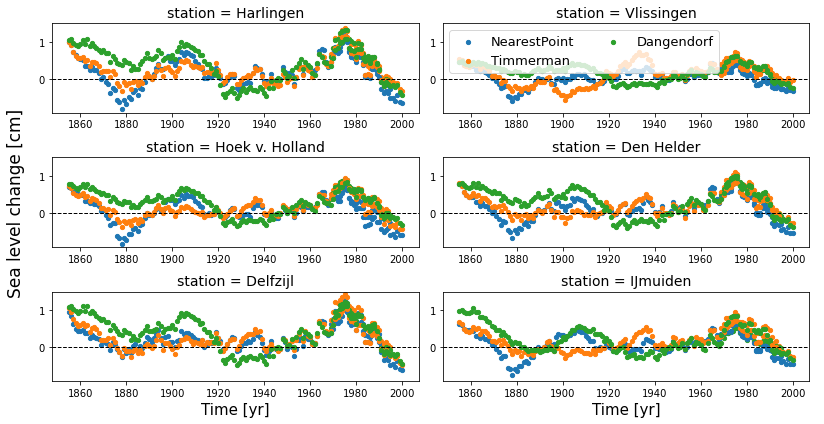

In [100]:
stations = [ 'Harlingen', 'Vlissingen', 'Hoek v. Holland', 'Den Helder', 'Delfzijl','IJmuiden']
colors = ['tab:blue', 'tab:orange', 'tab:green']
fsize = 15
ssize = 18
time_period = 39


n_rows = 3
n_cols = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize=(11, 6))


for i in range(n_rows):

    for j in range(n_cols):
        
        
        ax = axs[i,j]
        
        # NP 20CR
        years, trends, std =  get_decadal_trends_stds(timeseries_np_20cr[stations[n_cols*i+j], 'wind total'], time_period)
        ax.scatter(years, trends, marker = 'o', s = ssize, color = colors[0])
        
        # TIM 20CR
        years, trends, std =  get_decadal_trends_stds(timeseries_tim_20cr[stations[n_cols*i+j], 'wind total'], time_period)
        ax.scatter(years, trends, marker = 'o', s = ssize, color = colors[1])
        
        # DANG 20CR
        years, trends, std =  get_decadal_trends_stds(timeseries_dang_20cr[stations[n_cols*i+j], 'wind total'], time_period)
        ax.scatter(years, trends, marker = 'o', s = ssize, color = colors[2])
        
        # NP ERA5
        years, trends, std =  get_decadal_trends_stds(timeseries_np_era5[stations[n_cols*i+j], 'wind total'], time_period)
        ax.scatter(years, trends, marker = 'o', s = ssize, color = colors[0])
        
        # TIM ERA5
        years, trends, std =  get_decadal_trends_stds(timeseries_tim_era5[stations[n_cols*i+j], 'wind total'], time_period)
        ax.scatter(years, trends, marker = 'o', s = ssize, color = colors[1])
        
        # DANG ERA5
        years, trends, std =  get_decadal_trends_stds(timeseries_dang_era5[stations[n_cols*i+j], 'wind total'], time_period)
        ax.scatter(years, trends, marker = 'o', s = ssize, color = colors[2])
        
        
        ax.axhline(color='k', linestyle='--', linewidth = 1) 
        ax.set_ylim(-0.9,1.5)
        ax.set_title('station = '+stations[n_cols*i+j], fontsize = 14)
        if i == 2:
            ax.set_xlabel('Time [yr]', fontsize = fsize)
        
        plt.tight_layout()
        
        if i == 0 and j == 1:
            ax.legend(labels = ['NearestPoint', 'Timmerman', 'Dangendorf'], fontsize = 13, ncol=2)
        
# Adding a plot in the figure which will encapsulate all the subplots with axis showing only
fig.add_subplot(1, 1, 1, frame_on=False)

# Hiding the axis ticks and tick labels of the bigger plot
plt.tick_params(labelcolor="none", bottom=False, left=False)

# Adding the x-axis and y-axis labels for the bigger plot
plt.ylabel('Sea level change [cm]', fontsize = 17)      
        
plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/Wind contribution/comparison/trends_ac_allstations',
           dpi = 300, bbox_inches = 'tight')
